In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'cnn-time-stack.ipynb',
 'DataCleaning.ipynb',
 'feature select.ipynb',
 'LSTM.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'README.md',
 'tag盤點表.xlsx',
 'target.jpg',
 'train.csv',
 'train_FeatureSelected.csv',
 'xgboost.ipynb',
 '南亞PA廠資料分析_R6_1219.ipynb']

# LOAD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122774, 16)


,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0716A05,MLPAP_TI-0716A10,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0762A1.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-1721.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.862927,0.796892,3.036418,-4.444046,3.099350,-2.620349,-7.954421,-4.023225,-1.012546,-0.088237,0.914125
2016-05-10 08:20:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.895595,0.797109,2.863638,-4.435347,3.272202,-2.615166,-7.929338,-4.029503,-0.979549,-0.088237,0.919765
2016-05-10 08:30:00,-1.063656,-0.881876,0.436832,0.448320,0.250624,10.915349,0.797007,3.006192,-4.445760,3.596146,-2.617471,-7.933726,-4.017335,-0.973227,-0.088237,0.926346
2016-05-10 23:40:00,-1.741703,-1.506409,0.411823,0.468479,0.225612,9.160618,0.763807,1.710473,-3.055443,3.361722,-2.612923,-6.819627,-2.798058,-0.838001,-0.088237,0.906781
2016-05-10 23:50:00,-1.741703,-1.441295,0.412133,0.468479,0.225612,9.177640,0.764321,1.822236,-3.043572,3.029452,-2.621043,-6.875791,-2.799185,-0.866150,-0.088237,0.926688


# MinMaxscale

In [4]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop('target',axis=1).columns.tolist()
y_col = 'target'

sc = MinMaxScaler()
df[x_col] = sc.fit_transform(df[x_col])

df.head()

,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0716A05,MLPAP_TI-0716A10,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0762A1.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-1721.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,0.877049,0.882497,0.968352,0.977663,0.957710,0.998757,0.999915,0.877575,0.627877,0.564397,0.091998,0.057676,0.540759,0.574282,0.145161,0.914125
2016-05-10 08:20:00,0.877049,0.882497,0.968352,0.977663,0.957710,0.999531,1.000000,0.863137,0.628425,0.572776,0.092996,0.059450,0.540231,0.574777,0.145161,0.919765
2016-05-10 08:30:00,0.877049,0.882497,0.968465,0.977663,0.957710,1.000000,0.999960,0.875049,0.627769,0.588480,0.092552,0.059139,0.541254,0.574871,0.145161,0.926346
2016-05-10 23:40:00,0.852459,0.854387,0.959309,0.981970,0.951085,0.958377,0.986978,0.766776,0.715429,0.577116,0.093428,0.137926,0.643835,0.576899,0.145161,0.906781
2016-05-10 23:50:00,0.852459,0.857318,0.959423,0.981970,0.951085,0.958781,0.987179,0.776115,0.716178,0.561009,0.091865,0.133954,0.643740,0.576477,0.145161,0.926688


# stack time_step

In [5]:
def train_windows(df, ref_day=15, predict_day=1):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(df.shape[0]-predict_day-ref_day)):
        X_train.append(np.array(df.iloc[i:i+ref_day][x_col]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day][y_col]))
        i_lst.append(df.iloc[i+ref_day:i+ref_day+predict_day].index[0])
    return np.array(X_train), np.array(Y_train), i_lst

In [6]:
X, y, i_lst = train_windows(df, ref_day=15, predict_day=1)
print(len(X),len(y),len(i_lst))


122758 122758 122758


In [7]:
print(X.shape,y.shape)

(122758, 15, 15) (122758, 1)


In [8]:
X[0]

array([[0.87704918, 0.88249719, 0.96835173, 0.97766328, 0.95770952,
        0.99875654, 0.99991523, 0.87757459, 0.627877  , 0.56439704,
        0.0919981 , 0.05767595, 0.54075874, 0.57428171, 0.14516129],
       [0.87704918, 0.88249719, 0.96835173, 0.97766328, 0.95770952,
        0.99953142, 1.        , 0.86313673, 0.62842548, 0.57277625,
        0.09299574, 0.05944977, 0.54023059, 0.57477651, 0.14516129],
       [0.87704918, 0.88249719, 0.96846511, 0.97766328, 0.95770952,
        1.        , 0.99996025, 0.87504881, 0.6277689 , 0.58847984,
        0.0925521 , 0.0591395 , 0.54125427, 0.57487132, 0.14516129],
       [0.85245902, 0.85438729, 0.95930937, 0.9819697 , 0.95108459,
        0.95837717, 0.98697816, 0.76677552, 0.71542933, 0.57711587,
        0.09342758, 0.1379257 , 0.64383525, 0.57689907, 0.14516129],
       [0.85245902, 0.85731802, 0.95942284, 0.9819697 , 0.95108459,
        0.95878096, 0.9871792 , 0.77611474, 0.71617782, 0.56100861,
        0.09186459, 0.13395393, 0.64374036, 

In [9]:
y = pd.DataFrame(y,index=i_lst,columns=['y'])
y.head()

,y
2016-05-13 15:00:00,0.903952
2016-05-13 15:10:00,0.888240
2016-05-13 15:20:00,0.894072
2016-05-13 15:30:00,0.889203
2016-05-13 15:40:00,0.928332


# split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
X_val, X_test ,y_val ,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 7)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(85930, 15, 15) (85930, 1)
(18414, 15, 15) (18414, 1)
(18414, 15, 15) (18414, 1)


# LSTM MODEL(manyToOne1)

In [11]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM,TimeDistributed,Dense,Flatten
from keras.optimizers import Adam
import warnings;warnings.simplefilter('ignore')

# define model
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(100,return_sequences=True,input_shape=shape))
    model.add(LSTM(100))
    model.add(Dense(8))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=["mse"])
    model.summary()
    return model

# build model
model = buildManyToOneModel(X_train[0].shape)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 100)           46400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 127,617
Trainable params: 127,617
Non-trainable params: 0
_________________________________________________________________


# train model

In [12]:
history = model.fit(X_train,y_train,
                    batch_size = 64,
                    epochs = 10,
                    validation_data = (X_val,y_val),
                    verbose = 1)


Train on 85930 samples, validate on 18414 samples
Epoch 1/10


40960/85930 [=============>................] - ETA: 8:07 - loss: 0.8362 - mse: 0.836 - ETA: 2:24 - loss: 0.8277 - mse: 0.827 - ETA: 1:34 - loss: 0.8157 - mse: 0.815 - ETA: 1:14 - loss: 0.8043 - mse: 0.804 - ETA: 1:03 - loss: 0.7936 - mse: 0.793 - ETA: 56s - loss: 0.7833 - mse: 0.783 - ETA: 51s - loss: 0.7723 - mse: 0.77 - ETA: 47s - loss: 0.7612 - mse: 0.76 - ETA: 45s - loss: 0.7495 - mse: 0.74 - ETA: 43s - loss: 0.7370 - mse: 0.73 - ETA: 41s - loss: 0.7238 - mse: 0.72 - ETA: 39s - loss: 0.7097 - mse: 0.70 - ETA: 38s - loss: 0.6948 - mse: 0.69 - ETA: 37s - loss: 0.6790 - mse: 0.67 - ETA: 37s - loss: 0.6624 - mse: 0.66 - ETA: 36s - loss: 0.6447 - mse: 0.64 - ETA: 35s - loss: 0.6264 - mse: 0.62 - ETA: 35s - loss: 0.6072 - mse: 0.60 - ETA: 34s - loss: 0.5876 - mse: 0.58 - ETA: 33s - loss: 0.5678 - mse: 0.56 - ETA: 33s - loss: 0.5482 - mse: 0.54 - ETA: 33s - loss: 0.5289 - mse: 0.52 - ETA: 32s - loss: 0.5100 - mse: 0.51 - ETA: 32s - loss: 0.4917 - mse: 0.49 - ETA: 31s - loss: 0.4741 - mse:

85930/85930 [==============================] - ETA: 1s - loss: 0.0274 - mse: 0.027 - ETA: 1s - loss: 0.0273 - mse: 0.027 - ETA: 1s - loss: 0.0272 - mse: 0.027 - ETA: 1s - loss: 0.0272 - mse: 0.027 - ETA: 0s - loss: 0.0271 - mse: 0.027 - ETA: 0s - loss: 0.0271 - mse: 0.027 - ETA: 0s - loss: 0.0270 - mse: 0.027 - ETA: 0s - loss: 0.0270 - mse: 0.027 - ETA: 0s - loss: 0.0269 - mse: 0.026 - ETA: 0s - loss: 0.0268 - mse: 0.026 - ETA: 0s - loss: 0.0268 - mse: 0.026 - ETA: 0s - loss: 0.0267 - mse: 0.026 - ETA: 0s - loss: 0.0266 - mse: 0.026 - ETA: 0s - loss: 0.0266 - mse: 0.026 - ETA: 0s - loss: 0.0265 - mse: 0.026 - ETA: 0s - loss: 0.0265 - mse: 0.026 - ETA: 0s - loss: 0.0264 - mse: 0.026 - ETA: 0s - loss: 0.0263 - mse: 0.026 - ETA: 0s - loss: 0.0263 - mse: 0.026 - ETA: 0s - loss: 0.0262 - mse: 0.026 - 30s 345us/step - loss: 0.0262 - mse: 0.0262 - val_loss: 9.1057e-05 - val_mse: 9.1057e-05
Epoch 2/10


33984/85930 [==========>...................] - ETA: 32s - loss: 7.7286e-05 - mse: 7.7286e- - ETA: 28s - loss: 8.1295e-05 - mse: 8.1295e- - ETA: 28s - loss: 7.8651e-05 - mse: 7.8651e- - ETA: 29s - loss: 7.7617e-05 - mse: 7.7617e- - ETA: 29s - loss: 7.9092e-05 - mse: 7.9092e- - ETA: 29s - loss: 8.1449e-05 - mse: 8.1449e- - ETA: 29s - loss: 8.3642e-05 - mse: 8.3642e- - ETA: 28s - loss: 8.6098e-05 - mse: 8.6098e- - ETA: 28s - loss: 8.7874e-05 - mse: 8.7874e- - ETA: 28s - loss: 8.8056e-05 - mse: 8.8056e- - ETA: 28s - loss: 9.0111e-05 - mse: 9.0111e- - ETA: 27s - loss: 8.9051e-05 - mse: 8.9051e- - ETA: 27s - loss: 9.0231e-05 - mse: 9.0231e- - ETA: 27s - loss: 9.0065e-05 - mse: 9.0065e- - ETA: 27s - loss: 9.0198e-05 - mse: 9.0198e- - ETA: 27s - loss: 9.0665e-05 - mse: 9.0665e- - ETA: 27s - loss: 9.2760e-05 - mse: 9.2760e- - ETA: 27s - loss: 9.3056e-05 - mse: 9.3056e- - ETA: 27s - loss: 9.3485e-05 - mse: 9.3485e- - ETA: 27s - loss: 9.2878e-05 - mse: 9.2878e- - ETA: 27s - loss: 9.3393e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 8.8192e-05 - mse: 8.8192e-0 - ETA: 5s - loss: 8.8164e-05 - mse: 8.8164e-0 - ETA: 5s - loss: 8.8157e-05 - mse: 8.8157e-0 - ETA: 5s - loss: 8.8136e-05 - mse: 8.8136e-0 - ETA: 5s - loss: 8.8133e-05 - mse: 8.8133e-0 - ETA: 5s - loss: 8.8169e-05 - mse: 8.8169e-0 - ETA: 5s - loss: 8.8137e-05 - mse: 8.8137e-0 - ETA: 5s - loss: 8.8133e-05 - mse: 8.8133e-0 - ETA: 5s - loss: 8.8126e-05 - mse: 8.8126e-0 - ETA: 4s - loss: 8.8098e-05 - mse: 8.8098e-0 - ETA: 4s - loss: 8.8101e-05 - mse: 8.8101e-0 - ETA: 4s - loss: 8.8094e-05 - mse: 8.8094e-0 - ETA: 4s - loss: 8.8079e-05 - mse: 8.8079e-0 - ETA: 4s - loss: 8.8059e-05 - mse: 8.8059e-0 - ETA: 4s - loss: 8.8057e-05 - mse: 8.8057e-0 - ETA: 4s - loss: 8.8063e-05 - mse: 8.8063e-0 - ETA: 4s - loss: 8.8037e-05 - mse: 8.8037e-0 - ETA: 4s - loss: 8.8039e-05 - mse: 8.8039e-0 - ETA: 4s - loss: 8.8013e-05 - mse: 8.8013e-0 - ETA: 4s - loss: 8.7995e-05 - mse: 8.7995e-0 - ETA: 4s - loss: 8.7981e-05 - mse:

32832/85930 [==========>...................] - ETA: 29s - loss: 1.0154e-04 - mse: 1.0154e- - ETA: 27s - loss: 8.2907e-05 - mse: 8.2907e- - ETA: 27s - loss: 8.9341e-05 - mse: 8.9341e- - ETA: 26s - loss: 8.6456e-05 - mse: 8.6456e- - ETA: 26s - loss: 8.5756e-05 - mse: 8.5756e- - ETA: 26s - loss: 8.6167e-05 - mse: 8.6167e- - ETA: 26s - loss: 8.5392e-05 - mse: 8.5392e- - ETA: 26s - loss: 8.6254e-05 - mse: 8.6254e- - ETA: 26s - loss: 8.6250e-05 - mse: 8.6250e- - ETA: 26s - loss: 8.6617e-05 - mse: 8.6617e- - ETA: 26s - loss: 8.6369e-05 - mse: 8.6369e- - ETA: 26s - loss: 8.6420e-05 - mse: 8.6420e- - ETA: 25s - loss: 8.6452e-05 - mse: 8.6452e- - ETA: 25s - loss: 8.5723e-05 - mse: 8.5723e- - ETA: 25s - loss: 8.5005e-05 - mse: 8.5005e- - ETA: 25s - loss: 8.4645e-05 - mse: 8.4645e- - ETA: 25s - loss: 8.4045e-05 - mse: 8.4045e- - ETA: 25s - loss: 8.4435e-05 - mse: 8.4435e- - ETA: 25s - loss: 8.3765e-05 - mse: 8.3765e- - ETA: 25s - loss: 8.3927e-05 - mse: 8.3927e- - ETA: 25s - loss: 8.3624e-05 - mse

85930/85930 [==============================] - ETA: 6s - loss: 8.1426e-05 - mse: 8.1426e-0 - ETA: 6s - loss: 8.1463e-05 - mse: 8.1463e-0 - ETA: 6s - loss: 8.1463e-05 - mse: 8.1463e-0 - ETA: 6s - loss: 8.1461e-05 - mse: 8.1461e-0 - ETA: 6s - loss: 8.1461e-05 - mse: 8.1461e-0 - ETA: 6s - loss: 8.1476e-05 - mse: 8.1476e-0 - ETA: 6s - loss: 8.1466e-05 - mse: 8.1466e-0 - ETA: 5s - loss: 8.1432e-05 - mse: 8.1432e-0 - ETA: 5s - loss: 8.1440e-05 - mse: 8.1440e-0 - ETA: 5s - loss: 8.1441e-05 - mse: 8.1441e-0 - ETA: 5s - loss: 8.1431e-05 - mse: 8.1431e-0 - ETA: 5s - loss: 8.1431e-05 - mse: 8.1431e-0 - ETA: 5s - loss: 8.1395e-05 - mse: 8.1395e-0 - ETA: 5s - loss: 8.1397e-05 - mse: 8.1397e-0 - ETA: 5s - loss: 8.1406e-05 - mse: 8.1406e-0 - ETA: 5s - loss: 8.1410e-05 - mse: 8.1410e-0 - ETA: 5s - loss: 8.1367e-05 - mse: 8.1367e-0 - ETA: 5s - loss: 8.1371e-05 - mse: 8.1371e-0 - ETA: 5s - loss: 8.1373e-05 - mse: 8.1373e-0 - ETA: 5s - loss: 8.1397e-05 - mse: 8.1396e-0 - ETA: 5s - loss: 8.1379e-05 - mse:

32000/85930 [==========>...................] - ETA: 30s - loss: 9.7170e-05 - mse: 9.7170e- - ETA: 28s - loss: 7.0844e-05 - mse: 7.0844e- - ETA: 26s - loss: 7.0226e-05 - mse: 7.0226e- - ETA: 27s - loss: 7.4005e-05 - mse: 7.4005e- - ETA: 28s - loss: 7.4459e-05 - mse: 7.4459e- - ETA: 30s - loss: 7.6101e-05 - mse: 7.6101e- - ETA: 32s - loss: 7.8322e-05 - mse: 7.8322e- - ETA: 31s - loss: 7.7455e-05 - mse: 7.7455e- - ETA: 32s - loss: 7.6575e-05 - mse: 7.6575e- - ETA: 32s - loss: 7.7975e-05 - mse: 7.7975e- - ETA: 33s - loss: 7.6910e-05 - mse: 7.6910e- - ETA: 33s - loss: 7.6340e-05 - mse: 7.6340e- - ETA: 33s - loss: 7.6447e-05 - mse: 7.6447e- - ETA: 32s - loss: 7.6690e-05 - mse: 7.6690e- - ETA: 32s - loss: 7.7588e-05 - mse: 7.7588e- - ETA: 32s - loss: 7.7635e-05 - mse: 7.7635e- - ETA: 31s - loss: 7.7979e-05 - mse: 7.7979e- - ETA: 31s - loss: 7.8099e-05 - mse: 7.8099e- - ETA: 31s - loss: 7.8185e-05 - mse: 7.8185e- - ETA: 31s - loss: 7.7461e-05 - mse: 7.7461e- - ETA: 30s - loss: 7.7525e-05 - mse

85930/85930 [==============================] - ETA: 6s - loss: 7.9998e-05 - mse: 7.9998e-0 - ETA: 6s - loss: 7.9994e-05 - mse: 7.9994e-0 - ETA: 6s - loss: 8.0024e-05 - mse: 8.0024e-0 - ETA: 6s - loss: 8.0012e-05 - mse: 8.0012e-0 - ETA: 6s - loss: 8.0018e-05 - mse: 8.0018e-0 - ETA: 6s - loss: 8.0046e-05 - mse: 8.0046e-0 - ETA: 6s - loss: 8.0043e-05 - mse: 8.0043e-0 - ETA: 6s - loss: 8.0039e-05 - mse: 8.0039e-0 - ETA: 6s - loss: 8.0035e-05 - mse: 8.0035e-0 - ETA: 6s - loss: 8.0006e-05 - mse: 8.0006e-0 - ETA: 6s - loss: 7.9964e-05 - mse: 7.9964e-0 - ETA: 5s - loss: 7.9952e-05 - mse: 7.9952e-0 - ETA: 5s - loss: 7.9936e-05 - mse: 7.9936e-0 - ETA: 5s - loss: 7.9932e-05 - mse: 7.9932e-0 - ETA: 5s - loss: 7.9928e-05 - mse: 7.9928e-0 - ETA: 5s - loss: 7.9924e-05 - mse: 7.9924e-0 - ETA: 5s - loss: 7.9901e-05 - mse: 7.9901e-0 - ETA: 5s - loss: 7.9900e-05 - mse: 7.9900e-0 - ETA: 5s - loss: 7.9889e-05 - mse: 7.9889e-0 - ETA: 5s - loss: 7.9891e-05 - mse: 7.9891e-0 - ETA: 5s - loss: 7.9887e-05 - mse:

33984/85930 [==========>...................] - ETA: 34s - loss: 7.1874e-05 - mse: 7.1874e- - ETA: 29s - loss: 8.3551e-05 - mse: 8.3551e- - ETA: 27s - loss: 7.8794e-05 - mse: 7.8794e- - ETA: 27s - loss: 8.1429e-05 - mse: 8.1429e- - ETA: 27s - loss: 7.8027e-05 - mse: 7.8027e- - ETA: 26s - loss: 7.7011e-05 - mse: 7.7011e- - ETA: 26s - loss: 7.6800e-05 - mse: 7.6800e- - ETA: 26s - loss: 7.5221e-05 - mse: 7.5221e- - ETA: 26s - loss: 7.5777e-05 - mse: 7.5777e- - ETA: 26s - loss: 7.5858e-05 - mse: 7.5858e- - ETA: 26s - loss: 7.6498e-05 - mse: 7.6498e- - ETA: 26s - loss: 7.7208e-05 - mse: 7.7208e- - ETA: 26s - loss: 7.7505e-05 - mse: 7.7505e- - ETA: 26s - loss: 7.9128e-05 - mse: 7.9128e- - ETA: 26s - loss: 7.9478e-05 - mse: 7.9478e- - ETA: 26s - loss: 7.9771e-05 - mse: 7.9771e- - ETA: 26s - loss: 7.9491e-05 - mse: 7.9491e- - ETA: 25s - loss: 7.9816e-05 - mse: 7.9816e- - ETA: 25s - loss: 8.0133e-05 - mse: 8.0133e- - ETA: 25s - loss: 8.0113e-05 - mse: 8.0113e- - ETA: 25s - loss: 7.9951e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.9278e-05 - mse: 7.9278e-0 - ETA: 5s - loss: 7.9297e-05 - mse: 7.9297e-0 - ETA: 5s - loss: 7.9292e-05 - mse: 7.9292e-0 - ETA: 5s - loss: 7.9294e-05 - mse: 7.9294e-0 - ETA: 5s - loss: 7.9293e-05 - mse: 7.9293e-0 - ETA: 5s - loss: 7.9329e-05 - mse: 7.9329e-0 - ETA: 5s - loss: 7.9310e-05 - mse: 7.9310e-0 - ETA: 5s - loss: 7.9283e-05 - mse: 7.9283e-0 - ETA: 5s - loss: 7.9294e-05 - mse: 7.9294e-0 - ETA: 5s - loss: 7.9330e-05 - mse: 7.9330e-0 - ETA: 4s - loss: 7.9316e-05 - mse: 7.9316e-0 - ETA: 4s - loss: 7.9335e-05 - mse: 7.9335e-0 - ETA: 4s - loss: 7.9378e-05 - mse: 7.9378e-0 - ETA: 4s - loss: 7.9342e-05 - mse: 7.9342e-0 - ETA: 4s - loss: 7.9324e-05 - mse: 7.9324e-0 - ETA: 4s - loss: 7.9348e-05 - mse: 7.9348e-0 - ETA: 4s - loss: 7.9348e-05 - mse: 7.9348e-0 - ETA: 4s - loss: 7.9372e-05 - mse: 7.9372e-0 - ETA: 4s - loss: 7.9372e-05 - mse: 7.9372e-0 - ETA: 4s - loss: 7.9364e-05 - mse: 7.9364e-0 - ETA: 4s - loss: 7.9357e-05 - mse:

33792/85930 [==========>...................] - ETA: 30s - loss: 8.1617e-05 - mse: 8.1617e- - ETA: 28s - loss: 8.8540e-05 - mse: 8.8540e- - ETA: 28s - loss: 8.6471e-05 - mse: 8.6471e- - ETA: 28s - loss: 7.8021e-05 - mse: 7.8021e- - ETA: 28s - loss: 7.8111e-05 - mse: 7.8111e- - ETA: 28s - loss: 7.8896e-05 - mse: 7.8896e- - ETA: 28s - loss: 8.1398e-05 - mse: 8.1398e- - ETA: 28s - loss: 8.0607e-05 - mse: 8.0607e- - ETA: 28s - loss: 7.9676e-05 - mse: 7.9676e- - ETA: 28s - loss: 7.9865e-05 - mse: 7.9865e- - ETA: 28s - loss: 7.9790e-05 - mse: 7.9790e- - ETA: 28s - loss: 7.9521e-05 - mse: 7.9521e- - ETA: 28s - loss: 7.8845e-05 - mse: 7.8845e- - ETA: 28s - loss: 7.8110e-05 - mse: 7.8110e- - ETA: 28s - loss: 7.8512e-05 - mse: 7.8512e- - ETA: 28s - loss: 7.8682e-05 - mse: 7.8682e- - ETA: 28s - loss: 7.8142e-05 - mse: 7.8142e- - ETA: 28s - loss: 7.8921e-05 - mse: 7.8921e- - ETA: 28s - loss: 7.8827e-05 - mse: 7.8827e- - ETA: 27s - loss: 7.8970e-05 - mse: 7.8970e- - ETA: 27s - loss: 7.8873e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.9214e-05 - mse: 7.9214e-0 - ETA: 5s - loss: 7.9245e-05 - mse: 7.9246e-0 - ETA: 5s - loss: 7.9254e-05 - mse: 7.9254e-0 - ETA: 5s - loss: 7.9293e-05 - mse: 7.9293e-0 - ETA: 5s - loss: 7.9297e-05 - mse: 7.9297e-0 - ETA: 5s - loss: 7.9318e-05 - mse: 7.9318e-0 - ETA: 5s - loss: 7.9333e-05 - mse: 7.9333e-0 - ETA: 5s - loss: 7.9328e-05 - mse: 7.9328e-0 - ETA: 5s - loss: 7.9306e-05 - mse: 7.9306e-0 - ETA: 5s - loss: 7.9329e-05 - mse: 7.9329e-0 - ETA: 5s - loss: 7.9336e-05 - mse: 7.9336e-0 - ETA: 5s - loss: 7.9360e-05 - mse: 7.9361e-0 - ETA: 5s - loss: 7.9363e-05 - mse: 7.9363e-0 - ETA: 4s - loss: 7.9355e-05 - mse: 7.9355e-0 - ETA: 4s - loss: 7.9314e-05 - mse: 7.9314e-0 - ETA: 4s - loss: 7.9295e-05 - mse: 7.9295e-0 - ETA: 4s - loss: 7.9262e-05 - mse: 7.9262e-0 - ETA: 4s - loss: 7.9264e-05 - mse: 7.9264e-0 - ETA: 4s - loss: 7.9238e-05 - mse: 7.9238e-0 - ETA: 4s - loss: 7.9273e-05 - mse: 7.9273e-0 - ETA: 4s - loss: 7.9268e-05 - mse:

33920/85930 [==========>...................] - ETA: 32s - loss: 9.6216e-05 - mse: 9.6216e- - ETA: 29s - loss: 8.2596e-05 - mse: 8.2596e- - ETA: 27s - loss: 7.6944e-05 - mse: 7.6944e- - ETA: 27s - loss: 7.6390e-05 - mse: 7.6390e- - ETA: 27s - loss: 7.7937e-05 - mse: 7.7937e- - ETA: 27s - loss: 7.9065e-05 - mse: 7.9065e- - ETA: 27s - loss: 7.7206e-05 - mse: 7.7206e- - ETA: 27s - loss: 7.7181e-05 - mse: 7.7181e- - ETA: 27s - loss: 7.6849e-05 - mse: 7.6849e- - ETA: 27s - loss: 7.6409e-05 - mse: 7.6409e- - ETA: 27s - loss: 7.5825e-05 - mse: 7.5825e- - ETA: 27s - loss: 7.5565e-05 - mse: 7.5565e- - ETA: 27s - loss: 7.6833e-05 - mse: 7.6833e- - ETA: 27s - loss: 7.6491e-05 - mse: 7.6491e- - ETA: 27s - loss: 7.6535e-05 - mse: 7.6535e- - ETA: 27s - loss: 7.6816e-05 - mse: 7.6816e- - ETA: 27s - loss: 7.6965e-05 - mse: 7.6965e- - ETA: 27s - loss: 7.7427e-05 - mse: 7.7427e- - ETA: 27s - loss: 7.7954e-05 - mse: 7.7954e- - ETA: 27s - loss: 7.8072e-05 - mse: 7.8072e- - ETA: 27s - loss: 7.8299e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.8900e-05 - mse: 7.8900e-0 - ETA: 5s - loss: 7.8892e-05 - mse: 7.8892e-0 - ETA: 5s - loss: 7.8924e-05 - mse: 7.8924e-0 - ETA: 5s - loss: 7.8938e-05 - mse: 7.8938e-0 - ETA: 5s - loss: 7.8927e-05 - mse: 7.8927e-0 - ETA: 5s - loss: 7.8996e-05 - mse: 7.8996e-0 - ETA: 5s - loss: 7.9027e-05 - mse: 7.9027e-0 - ETA: 5s - loss: 7.9016e-05 - mse: 7.9016e-0 - ETA: 5s - loss: 7.9030e-05 - mse: 7.9030e-0 - ETA: 5s - loss: 7.9057e-05 - mse: 7.9057e-0 - ETA: 5s - loss: 7.9052e-05 - mse: 7.9052e-0 - ETA: 4s - loss: 7.9056e-05 - mse: 7.9056e-0 - ETA: 4s - loss: 7.9080e-05 - mse: 7.9080e-0 - ETA: 4s - loss: 7.9083e-05 - mse: 7.9083e-0 - ETA: 4s - loss: 7.9091e-05 - mse: 7.9091e-0 - ETA: 4s - loss: 7.9087e-05 - mse: 7.9087e-0 - ETA: 4s - loss: 7.9060e-05 - mse: 7.9060e-0 - ETA: 4s - loss: 7.9064e-05 - mse: 7.9064e-0 - ETA: 4s - loss: 7.9086e-05 - mse: 7.9086e-0 - ETA: 4s - loss: 7.9072e-05 - mse: 7.9072e-0 - ETA: 4s - loss: 7.9083e-05 - mse:

33920/85930 [==========>...................] - ETA: 11s - loss: 7.7374e-05 - mse: 7.7374e- - ETA: 27s - loss: 8.1189e-05 - mse: 8.1189e- - ETA: 27s - loss: 7.6665e-05 - mse: 7.6665e- - ETA: 26s - loss: 8.1660e-05 - mse: 8.1660e- - ETA: 26s - loss: 8.0658e-05 - mse: 8.0658e- - ETA: 26s - loss: 7.9868e-05 - mse: 7.9868e- - ETA: 26s - loss: 8.0332e-05 - mse: 8.0332e- - ETA: 26s - loss: 8.0027e-05 - mse: 8.0027e- - ETA: 26s - loss: 7.9671e-05 - mse: 7.9671e- - ETA: 26s - loss: 7.9232e-05 - mse: 7.9232e- - ETA: 26s - loss: 7.8154e-05 - mse: 7.8154e- - ETA: 26s - loss: 7.8198e-05 - mse: 7.8198e- - ETA: 26s - loss: 7.7412e-05 - mse: 7.7412e- - ETA: 26s - loss: 7.7965e-05 - mse: 7.7965e- - ETA: 26s - loss: 7.7056e-05 - mse: 7.7056e- - ETA: 26s - loss: 7.7100e-05 - mse: 7.7100e- - ETA: 26s - loss: 7.7448e-05 - mse: 7.7448e- - ETA: 25s - loss: 7.7321e-05 - mse: 7.7321e- - ETA: 25s - loss: 7.8046e-05 - mse: 7.8046e- - ETA: 25s - loss: 7.8790e-05 - mse: 7.8790e- - ETA: 25s - loss: 7.9791e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.9505e-05 - mse: 7.9505e-0 - ETA: 5s - loss: 7.9465e-05 - mse: 7.9465e-0 - ETA: 5s - loss: 7.9450e-05 - mse: 7.9450e-0 - ETA: 5s - loss: 7.9486e-05 - mse: 7.9486e-0 - ETA: 5s - loss: 7.9494e-05 - mse: 7.9494e-0 - ETA: 5s - loss: 7.9488e-05 - mse: 7.9488e-0 - ETA: 5s - loss: 7.9478e-05 - mse: 7.9478e-0 - ETA: 5s - loss: 7.9488e-05 - mse: 7.9488e-0 - ETA: 5s - loss: 7.9503e-05 - mse: 7.9503e-0 - ETA: 5s - loss: 7.9469e-05 - mse: 7.9469e-0 - ETA: 4s - loss: 7.9480e-05 - mse: 7.9480e-0 - ETA: 4s - loss: 7.9488e-05 - mse: 7.9489e-0 - ETA: 4s - loss: 7.9498e-05 - mse: 7.9498e-0 - ETA: 4s - loss: 7.9518e-05 - mse: 7.9518e-0 - ETA: 4s - loss: 7.9532e-05 - mse: 7.9532e-0 - ETA: 4s - loss: 7.9503e-05 - mse: 7.9503e-0 - ETA: 4s - loss: 7.9477e-05 - mse: 7.9477e-0 - ETA: 4s - loss: 7.9466e-05 - mse: 7.9466e-0 - ETA: 4s - loss: 7.9456e-05 - mse: 7.9456e-0 - ETA: 4s - loss: 7.9444e-05 - mse: 7.9444e-0 - ETA: 4s - loss: 7.9463e-05 - mse:

33920/85930 [==========>...................] - ETA: 30s - loss: 6.7955e-05 - mse: 6.7955e- - ETA: 28s - loss: 9.1648e-05 - mse: 9.1648e- - ETA: 27s - loss: 9.1899e-05 - mse: 9.1899e- - ETA: 27s - loss: 8.8079e-05 - mse: 8.8079e- - ETA: 27s - loss: 8.6582e-05 - mse: 8.6582e- - ETA: 26s - loss: 8.5607e-05 - mse: 8.5607e- - ETA: 26s - loss: 8.4062e-05 - mse: 8.4062e- - ETA: 26s - loss: 8.1204e-05 - mse: 8.1204e- - ETA: 26s - loss: 8.0974e-05 - mse: 8.0974e- - ETA: 26s - loss: 8.2726e-05 - mse: 8.2726e- - ETA: 26s - loss: 8.3446e-05 - mse: 8.3446e- - ETA: 26s - loss: 8.4531e-05 - mse: 8.4531e- - ETA: 26s - loss: 8.3561e-05 - mse: 8.3561e- - ETA: 26s - loss: 8.2991e-05 - mse: 8.2991e- - ETA: 26s - loss: 8.2651e-05 - mse: 8.2651e- - ETA: 26s - loss: 8.3129e-05 - mse: 8.3130e- - ETA: 26s - loss: 8.2473e-05 - mse: 8.2473e- - ETA: 25s - loss: 8.2691e-05 - mse: 8.2691e- - ETA: 25s - loss: 8.2509e-05 - mse: 8.2509e- - ETA: 25s - loss: 8.2153e-05 - mse: 8.2153e- - ETA: 25s - loss: 8.2099e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.9124e-05 - mse: 7.9124e-0 - ETA: 5s - loss: 7.9143e-05 - mse: 7.9143e-0 - ETA: 5s - loss: 7.9140e-05 - mse: 7.9140e-0 - ETA: 5s - loss: 7.9141e-05 - mse: 7.9141e-0 - ETA: 5s - loss: 7.9168e-05 - mse: 7.9168e-0 - ETA: 5s - loss: 7.9138e-05 - mse: 7.9138e-0 - ETA: 5s - loss: 7.9138e-05 - mse: 7.9138e-0 - ETA: 5s - loss: 7.9105e-05 - mse: 7.9105e-0 - ETA: 5s - loss: 7.9079e-05 - mse: 7.9079e-0 - ETA: 5s - loss: 7.9047e-05 - mse: 7.9047e-0 - ETA: 4s - loss: 7.9064e-05 - mse: 7.9064e-0 - ETA: 4s - loss: 7.9120e-05 - mse: 7.9120e-0 - ETA: 4s - loss: 7.9141e-05 - mse: 7.9141e-0 - ETA: 4s - loss: 7.9193e-05 - mse: 7.9193e-0 - ETA: 4s - loss: 7.9211e-05 - mse: 7.9212e-0 - ETA: 4s - loss: 7.9244e-05 - mse: 7.9244e-0 - ETA: 4s - loss: 7.9239e-05 - mse: 7.9239e-0 - ETA: 4s - loss: 7.9221e-05 - mse: 7.9221e-0 - ETA: 4s - loss: 7.9227e-05 - mse: 7.9227e-0 - ETA: 4s - loss: 7.9297e-05 - mse: 7.9297e-0 - ETA: 4s - loss: 7.9276e-05 - mse:

33856/85930 [==========>...................] - ETA: 29s - loss: 6.9461e-05 - mse: 6.9461e- - ETA: 28s - loss: 8.1574e-05 - mse: 8.1574e- - ETA: 27s - loss: 7.6658e-05 - mse: 7.6658e- - ETA: 27s - loss: 7.3604e-05 - mse: 7.3604e- - ETA: 27s - loss: 7.8637e-05 - mse: 7.8637e- - ETA: 26s - loss: 7.8498e-05 - mse: 7.8498e- - ETA: 26s - loss: 8.0319e-05 - mse: 8.0319e- - ETA: 26s - loss: 8.0006e-05 - mse: 8.0006e- - ETA: 26s - loss: 7.9971e-05 - mse: 7.9971e- - ETA: 26s - loss: 8.0666e-05 - mse: 8.0666e- - ETA: 27s - loss: 8.1438e-05 - mse: 8.1438e- - ETA: 27s - loss: 8.2032e-05 - mse: 8.2032e- - ETA: 27s - loss: 8.1433e-05 - mse: 8.1433e- - ETA: 26s - loss: 8.1477e-05 - mse: 8.1477e- - ETA: 26s - loss: 8.1308e-05 - mse: 8.1308e- - ETA: 26s - loss: 8.1474e-05 - mse: 8.1474e- - ETA: 26s - loss: 8.1784e-05 - mse: 8.1784e- - ETA: 26s - loss: 8.2767e-05 - mse: 8.2767e- - ETA: 26s - loss: 8.3026e-05 - mse: 8.3026e- - ETA: 26s - loss: 8.2638e-05 - mse: 8.2638e- - ETA: 26s - loss: 8.2094e-05 - mse

85930/85930 [==============================] - ETA: 5s - loss: 7.8918e-05 - mse: 7.8918e-0 - ETA: 5s - loss: 7.8895e-05 - mse: 7.8895e-0 - ETA: 5s - loss: 7.8879e-05 - mse: 7.8879e-0 - ETA: 5s - loss: 7.8876e-05 - mse: 7.8877e-0 - ETA: 5s - loss: 7.8855e-05 - mse: 7.8855e-0 - ETA: 5s - loss: 7.8853e-05 - mse: 7.8853e-0 - ETA: 5s - loss: 7.8823e-05 - mse: 7.8823e-0 - ETA: 5s - loss: 7.8851e-05 - mse: 7.8852e-0 - ETA: 5s - loss: 7.8871e-05 - mse: 7.8871e-0 - ETA: 5s - loss: 7.8868e-05 - mse: 7.8868e-0 - ETA: 4s - loss: 7.8888e-05 - mse: 7.8888e-0 - ETA: 4s - loss: 7.8922e-05 - mse: 7.8922e-0 - ETA: 4s - loss: 7.8907e-05 - mse: 7.8907e-0 - ETA: 4s - loss: 7.8910e-05 - mse: 7.8910e-0 - ETA: 4s - loss: 7.8892e-05 - mse: 7.8892e-0 - ETA: 4s - loss: 7.8892e-05 - mse: 7.8892e-0 - ETA: 4s - loss: 7.8895e-05 - mse: 7.8895e-0 - ETA: 4s - loss: 7.8891e-05 - mse: 7.8891e-0 - ETA: 4s - loss: 7.8888e-05 - mse: 7.8888e-0 - ETA: 4s - loss: 7.8895e-05 - mse: 7.8895e-0 - ETA: 4s - loss: 7.8884e-05 - mse:

# evaluate model

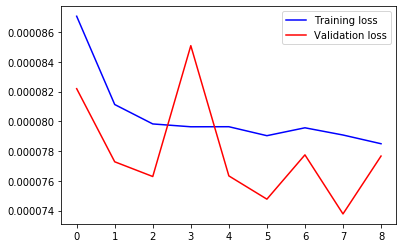

In [17]:
n = 1
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

# predict
y_pred = model.predict(X_test).ravel()
y_pred = pd.DataFrame(y_pred,index=y_test.index,columns=['y_pred'])

# sort index
y_pred = y_pred.sort_index()
y_test = y_test.sort_index()

# score
print(round(r2_score(y_test,y_pred),4))
print(round(mean_squared_error(y_test,y_pred),4))

0.1443
0.0001


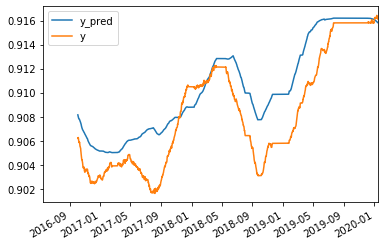

In [15]:
plot_data = pd.concat([y_pred,y_test],axis=1)
plot_data.rolling(6*24*15).mean().plot()